# VISIONS-2 data plotter

### Load basic VISIONS-2 data

In [1]:
import sys 
sys.path.append('/Users/abrenema/Desktop/code/Aaron/github/mission_routines/rockets/visions2/')
sys.path.append('/Users/abrenema/Desktop/code/Aaron/github/plasma-physics-general/')
import visions2_load_data
import numpy as np 
import matplotlib.pyplot as plt


"""Enable auto module reloading"""
%load_ext autoreload
%autoreload 2

"""Load Langmuir Probe data"""
lp = visions2_load_data.load_langmuir()

"""Load magnetometer data"""
mag = visions2_load_data.load_mag()

"""Load particle data"""
#All particle data
eeaDat = visions2_load_data.load_particle("eea")
#Sum over perpendicular pitch angles
eeaDatPerp = visions2_load_data.load_particle("eea",range=[70,110],sumtype=1)
#Sum over parallel pitch angles
eeaDatPar = visions2_load_data.load_particle("eea",range=[-20,20],sumtype=1)
#Sum over energies
eeaDatLowE = visions2_load_data.load_particle("eea",range=[500,200000],sumtype=2)
eeaDatHigE = visions2_load_data.load_particle("eea",range=[0,200],sumtype=2)


eiaDat = visions2_load_data.load_particle("eia")
#Sum over perp PA 
eiaDatPerp = visions2_load_data.load_particle("eia",range=[70,110],sumtype=1)
#Sum over parallel PA
eiaDatPar = visions2_load_data.load_particle("eia",range=[-20,20],sumtype=1)
#Sum over energies
eiaDatLowE = visions2_load_data.load_particle("eia",range=[0,10],sumtype=2)
eiaDatHigE = visions2_load_data.load_particle("eia",range=[1000,30000],sumtype=2)


"""Load VLF data"""
vlf12_data = visions2_load_data.load_vlf()

vlf12 = vlf12_data["dvlf12"]
times_vlf = vlf12_data["tvlf12"]
#sampling freq
sr = [1/(times_vlf[i+1]-times_vlf[i]) for i in range(times_vlf.size-1)]
fsVLF = np.mean(sr)


LOAD MAG: Currently low flyer only!
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD VLF: Currently low flyer only


### Test the integrated particle data

NameError: name 'eiaDatE' is not defined

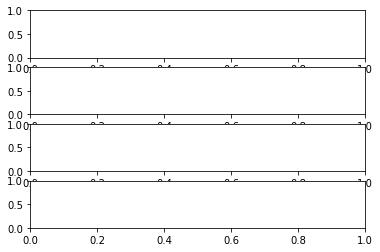

In [2]:
"""Test plot the particle data as compared to the integrated particle data"""

import sys 
import numpy as np
import visions2_load_data
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4)


pre = "eia"

#Set log z-scale for particle fluxes
vmin = 6 
vmax = 12

if pre == "eea":

    pcm1 = axs[0].pcolormesh(eeaDatPerp["times"], eeaDatPerp["energies"], np.transpose(np.log10(eeaDatPerp["flux"])), shading='gouraud', cmap='turbo',vmin=vmin,vmax=vmax)
    axs[0].set_title(pre)
    fig.colorbar(pcm1, label="e- flux all PA summed", ax=axs[0])

    pcm2 = axs[1].pcolormesh(eeaDat["times"], eeaDat["energies"], np.transpose(np.log10(eeaDat["flux"][:,:,10])), shading='gouraud', cmap='turbo',vmin=vmin,vmax=vmax)
    axs[1].set_title(pre)
    fig.colorbar(pcm2, label="e- flux 90 deg", ax=axs[1])

    for i in axs: i.set_xlim(200, 700)
    for i in range(2): 
        axs[i].set_yscale('log')
        axs[i].set_ylim(1, 30000)
        axs[i].set_ylabel("Energy [eV]")
        axs[i].set_xlabel("MET (sec)")


    sort = np.argsort(eeaDatP["pitchangles"])

    pcm1 = axs[2].pcolormesh(eeaDatP["times"], eeaDatP["pitchangles"][sort], np.transpose(np.log10(eeaDatP["flux"][:,sort])), shading='gouraud', cmap='turbo',vmin=vmin,vmax=vmax)
    axs[2].set_title(pre)
    fig.colorbar(pcm1, label="e- flux all PA summed", ax=axs[2])

    pcm2 = axs[3].pcolormesh(eeaDat["times"], eeaDat["pitchangles"][sort], np.transpose(np.log10(eeaDat["flux"][:,31,sort])), shading='gouraud', cmap='turbo',vmin=vmin,vmax=vmax)
    axs[3].set_title(pre)
    fig.colorbar(pcm2, label="e- flux 90 deg", ax=axs[3])


    #for i in axs: i.set_xlim(200, 700)
    for i in range(2,2): 
        axs[i].set_yscale('linear')
        axs[i].set_ylim(-180,180)
        axs[i].set_ylabel("Pitch-angle [deg]")
        axs[i].set_xlabel("MET (sec)")




if pre == "eia":

    pcm1 = axs[0].pcolormesh(eiaDatE["times"], eiaDatE["energies"], np.transpose(np.log10(eiaDatE["flux"])), shading='gouraud', cmap='turbo',vmin=vmin,vmax=vmax)
    axs[0].set_title(pre)
    fig.colorbar(pcm1, label="e- flux all PA summed", ax=axs[0])

    pcm2 = axs[1].pcolormesh(eiaDat["times"], eiaDat["energies"], np.transpose(np.log10(eiaDat["flux"][:,:,10])), shading='gouraud', cmap='turbo',vmin=vmin,vmax=vmax)
    axs[1].set_title(pre)
    fig.colorbar(pcm2, label="e- flux 90 deg", ax=axs[1])

    for i in axs: i.set_xlim(200, 700)
    for i in range(2): 
        axs[i].set_yscale('log')
        axs[i].set_ylim(1, 30000)
        axs[i].set_ylabel("Energy [eV]")
        axs[i].set_xlabel("MET (sec)")


    sort = np.argsort(eiaDatP["pitchangles"])

    pcm1 = axs[2].pcolormesh(eiaDatP["times"], eiaDatP["pitchangles"][sort], np.transpose(np.log10(eiaDatP["flux"][:,sort])), shading='gouraud', cmap='turbo',vmin=vmin,vmax=vmax)
    axs[2].set_title(pre)
    fig.colorbar(pcm1, label="e- flux all PA summed", ax=axs[2])

    pcm2 = axs[3].pcolormesh(eiaDat["times"], eiaDat["pitchangles"][sort], np.transpose(np.log10(eiaDat["flux"][:,34,sort])), shading='gouraud', cmap='turbo',vmin=vmin,vmax=vmax)
    axs[3].set_title(pre)
    fig.colorbar(pcm2, label="e- flux 90 deg", ax=axs[3])


    #for i in axs: i.set_xlim(200, 700)
    for i in range(2,2): 
        axs[i].set_yscale('linear')
        axs[i].set_ylim(-180,180)
        axs[i].set_ylabel("Pitch-angle [deg]")
        axs[i].set_xlabel("MET (sec)")




### Get lower hybrid and other important frequencies

In [3]:

import plasma_params_get_flhr_freq

#Interpolate Langmuir probe density values to the time cadence of mag data. 
ne = np.interp(mag["times"], lp["lowflyer"]["times"], lp["lowflyer"]["ne"])

nH_ne = [0.] * np.size(mag["times"]) #fraction of H+
nO_ne = [1.] * np.size(mag["times"]) #fraction of O+
#print(np.type(np.size(mag["times"])))

#ne = 7e4  #rough value from Hassan's Langmuir probe results.
#1e4 gives a much better flhr when compared to the VLF data...Not sure what's going on here. 


#First test applicability of high density limit. 
#flhr_test = visions2_get_flhr.flhr_HighDensityLimitTest(ne, mag["fce"], mag["fcH"])
flhr_test = plasma_params_get_flhr_freq.flhr_HighDensityLimitTest(ne, mag["fce"], mag["fcH"])
print(flhr_test["info"])
print("fpi/fce*fci = ", np.median(flhr_test["fpi_fcefci"]))


#flhr in high density limit for pure H+ and O+ plasmas
flhr_highdens_H = plasma_params_get_flhr_freq.flhr_HighDensityLimit(mag["fce"], mag["fcH"])  #100% H+
flhr_highdens_O = plasma_params_get_flhr_freq.flhr_HighDensityLimit(mag["fce"], mag["fcO"])  #100% O+
print("flhr_highdens_H = ", np.median(flhr_highdens_H))
print("flhr_highdens_O = ", np.median(flhr_highdens_O))

#flhr w/o high density assumption
print(np.median(mag["fce"]))
print(ne)
flhr_MassFrac = plasma_params_get_flhr_freq.flhr_IonMassFractions(ne, mag["fce"], nH_ne, nO_ne)
print("flhr_MassFrac = ", np.median(flhr_MassFrac))
#plt.plot(flhr_MassFrac)


#Lower hybrid frequency (not in high density limit) for full H+ and full O+
flhr_H = plasma_params_get_flhr_freq.flhr_H(ne, mag["fce"], mag["fcH"])
flhr_O = plasma_params_get_flhr_freq.flhr_H(ne, mag["fce"], mag["fcO"])
print("flhr_H = ", np.median(flhr_H))
print("flhr_O = ", np.median(flhr_O))



/Users/abrenema/Desktop/code/Aaron/github/plasma-physics-general/plasma_params_get_flhr_freq.py:33: RuntimeWarning: invalid value encountered in sqrt
  fpe = [8980.*np.sqrt(ne[i]) for i in range(len(fce))]


High density limit only if fpi^2 >> fce*fci. Same value for every ion species
fpi/fce*fci =  nan
flhr_highdens_H =  28347.965644481214
flhr_highdens_O =  7319.413255995716
1214669.806469125
[ 216901.34623248  216901.34623248  216901.34623248 ... -272327.528866
 -272327.528866   -272327.528866  ]


/Users/abrenema/Desktop/code/Aaron/github/plasma-physics-general/plasma_params_get_flhr_freq.py:56: RuntimeWarning: invalid value encountered in sqrt
  fpe = [8980.*np.sqrt(ne[i]) for i in range(len(ne))]


flhr_MassFrac =  nan


/Users/abrenema/Desktop/code/Aaron/github/plasma-physics-general/plasma_params_get_flhr_freq.py:70: RuntimeWarning: invalid value encountered in sqrt
  fpe = [8980.*np.sqrt(ne[i]) for i in range(len(ne))] #Hz


flhr_H =  nan
flhr_O =  nan


### Test out flhr curves

(5000.0, 9000.0)

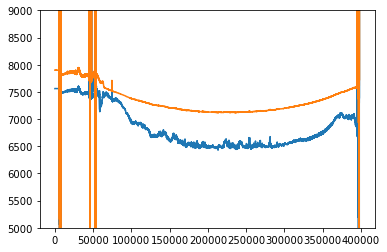

In [ ]:
#Test plotting for flhr 

#plt.plot(flhr_highdens_O)
plt.plot(flhr_MassFrac)
plt.plot(flhr_O)
plt.ylim(5000, 9000)

#flhr_highdens_H = plasma_params_get_flhr_freq.flhr_HighDensityLimit(mag["fce"], mag["fcH"])  #100% H+
#flhr_highdens_O = plasma_params_get_flhr_freq.flhr_HighDensityLimit(mag["fce"], mag["fcO"])  #100% O+
#flhr_MassFrac = plasma_params_get_flhr_freq.flhr_IonMassFractions(ne, mag["fce"], nH_ne, nO_ne)
#flhr_H = plasma_params_get_flhr_freq.flhr_H(ne, mag["fce"], mag["fcH"])
#flhr_O = plasma_params_get_flhr_freq.flhr_H(ne, mag["fce"], mag["fcO"])



### Plot VLF wave overview

(1.0, 10000.0)

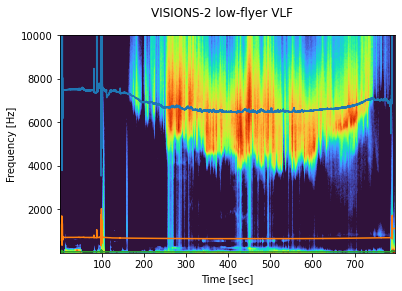

In [4]:
#Plot VLF waves

fig, axs = plt.subplots(1)
fig.suptitle('VISIONS-2 low-flyer VLF')

kwargs = {"vmin":-50, "vmax":-10}
Sxx, specfreqs, spectimes, im = axs.specgram(vlf12, Fs=fsVLF, NFFT=512, scale='dB', **kwargs, cmap='turbo')

fcH_interp = np.interp(spectimes, mag["times"], mag["fcH"])
fcO_interp = np.interp(spectimes, mag["times"], mag["fcO"])
flh_interp = np.interp(spectimes, mag["times"], flhr_MassFrac)
axs.plot(spectimes, flh_interp)
axs.plot(spectimes, fcH_interp)
axs.plot(spectimes, fcO_interp)
axs.set_ylabel('Frequency [Hz]')
axs.set_xlabel('Time [sec]')
axs.set_yscale('linear')
axs.set_ylim(1,10000)



### Plot VLF waves and electrons

/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_62861/2130606391.py:49: RuntimeWarning: divide by zero encountered in log10
  pcm1 = axs[p].pcolormesh(eeaDatPerp["times"], eeaDatPerp["energies"], np.transpose(np.log10(eeaDatPerp["flux"])), shading='gouraud', cmap='turbo',vmin=8,vmax=11)
/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_62861/2130606391.py:58: RuntimeWarning: divide by zero encountered in log10
  pcm1 = axs[p].pcolormesh(eeaDatPar["times"], eeaDatPar["energies"], np.transpose(np.log10(eeaDatPar["flux"])), shading='gouraud', cmap='turbo',vmin=8,vmax=11)
/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_62861/2130606391.py:68: RuntimeWarning: divide by zero encountered in log10
  pcm1 = axs[p].pcolormesh(eeaDatLowE["times"], eeaDatLowE["pitchangles"][sort], np.transpose(np.log10(eeaDatLowE["flux"][:,sort])), shading='gouraud', cmap='turbo',vmin=8,vmax=11)
/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_62861/2130606391.py:78: Runtim

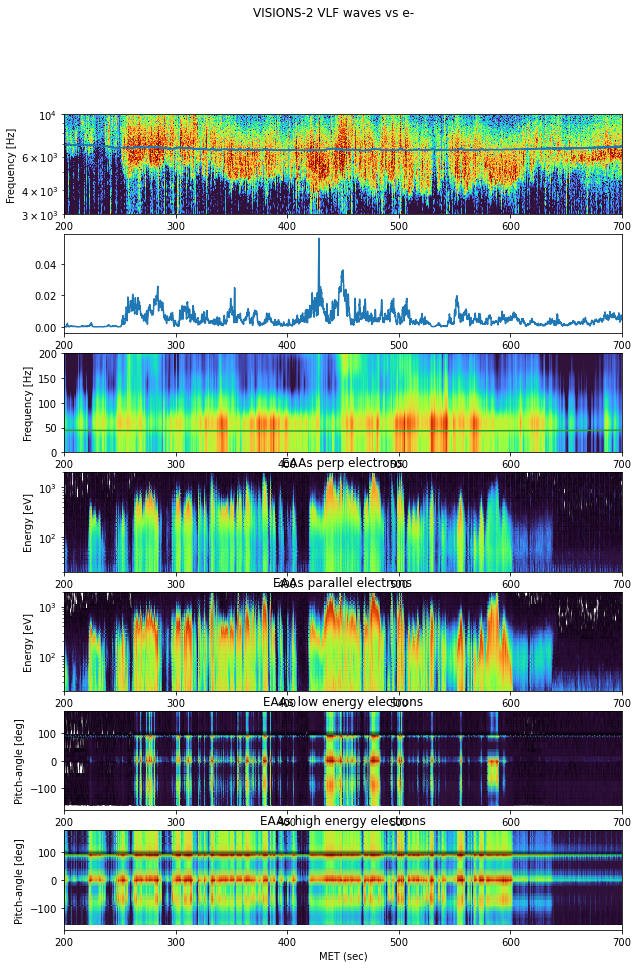

In [22]:
import scipy.signal

plt.rcParams['figure.figsize'] = [10, 15]


fig, axs = plt.subplots(6)
fig.suptitle('VISIONS-2 VLF waves vs e-')

kwargs = {"vmin":-50, "vmax":-10}

p = 0 
Sxx, specfreqs, spectimes, im = axs[p].specgram(vlf12, Fs=fsVLF, NFFT=512, scale='dB', **kwargs, cmap='turbo')

axs[p].plot(spectimes, flh_interp)
axs[p].plot(spectimes, fcH_interp)
axs[p].plot(spectimes, fcO_interp)
axs[p].set_ylabel('Frequency [Hz]')
axs[p].set_xlabel('Time [sec]')
axs[p].set_yscale('log')
axs[p].set_ylim(3000,10000)
#fig.colorbar(im, label="VLF12 dB", ax=axs[p])


p=p+1
Sxx, specfreqs, spectimes, im = axs[p].specgram(vlf12, Fs=fsVLF, NFFT=512, scale='dB', **kwargs, cmap='turbo')
axs[p].plot(spectimes, flh_interp)
axs[p].plot(spectimes, fcH_interp)
axs[p].plot(spectimes, fcO_interp)
axs[p].set_ylabel('Frequency [Hz]')
axs[p].set_xlabel('Time [sec]')
axs[p].set_yscale('linear')
axs[p].set_ylim(0,200)
#fig.colorbar(im, label="VLF12 dB", ax=axs[p])

p=p+1
pcm1 = axs[p].pcolormesh(eeaDatPerp["times"], eeaDatPerp["energies"], np.transpose(np.log10(eeaDatPerp["flux"])), shading='gouraud', cmap='turbo',vmin=8,vmax=11)
axs[p].set_title("EAAs perp electrons")
axs[p].set_yscale('log')
axs[p].set_ylim(20, 2000)
axs[p].set_ylabel("Energy [eV]")
axs[p].set_xlabel("MET (sec)")
#fig.colorbar(pcm1, ax=axs[p])

p=p+1
pcm1 = axs[p].pcolormesh(eeaDatPar["times"], eeaDatPar["energies"], np.transpose(np.log10(eeaDatPar["flux"])), shading='gouraud', cmap='turbo',vmin=8,vmax=11)
axs[p].set_title("EAAs parallel electrons")
axs[p].set_yscale('log')
axs[p].set_ylim(20, 2000)
axs[p].set_ylabel("Energy [eV]")
axs[p].set_xlabel("MET (sec)")
#fig.colorbar(pcm1, ax=axs[p])

p=p+1
sort = np.argsort(eeaDatLowE["pitchangles"])
pcm1 = axs[p].pcolormesh(eeaDatLowE["times"], eeaDatLowE["pitchangles"][sort], np.transpose(np.log10(eeaDatLowE["flux"][:,sort])), shading='gouraud', cmap='turbo',vmin=8,vmax=11)
axs[p].set_title("EAAs low energy electrons")
axs[p].set_yscale('linear')
axs[p].set_ylim(-180,180)
axs[p].set_ylabel("Pitch-angle [deg]")
axs[p].set_xlabel("MET (sec)")
#fig.colorbar(pcm1, ax=axs[p])

p=p+1
sort = np.argsort(eeaDatHigE["pitchangles"])
pcm1 = axs[p].pcolormesh(eeaDatHigE["times"], eeaDatHigE["pitchangles"][sort], np.transpose(np.log10(eeaDatHigE["flux"][:,sort])), shading='gouraud', cmap='turbo',vmin=8,vmax=11)
axs[p].set_title("EAAs high energy electrons")
axs[p].set_yscale('linear')
axs[p].set_ylim(-180,180)
axs[p].set_ylabel("Pitch-angle [deg]")
axs[p].set_xlabel("MET (sec)")
#fig.colorbar(pcm1, ax=axs[p])


for i in axs: i.set_xlim(200, 700)



#### Create integrated line plots from spectra

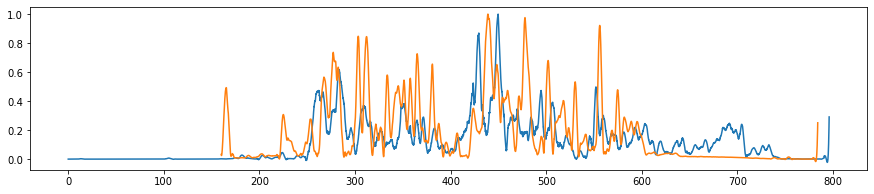

In [41]:
plt.rcParams['figure.figsize'] = [15, 3]

import math 
import scipy.signal 

#Integrate spectral and particle

smootime = 10. #smooth time in sec
poly = 5



flow = 3000. 
fhig = 10000. 
goodf = np.where((specfreqs >= flow) & (specfreqs <= fhig))
vlfAmp = []
for i in range(len(spectimes)):
    vlfAmp.append(np.sum(Sxx[goodf, i])/np.size(goodf))

sr = 1/(np.median(spectimes - np.roll(spectimes,1)))
npts = math.floor(sr * smootime)
#require npts to be an odd number
if npts % 2 == 0:
    npts = npts + 1


vlfAmp_smoothed = scipy.signal.savgol_filter(vlfAmp, npts, poly)


#axs = plt.subplots(1)
#plt.plot(spectimes,vlfAmp)
#plt.plot(spectimes,vlfAmp_smoothed)


#eeaDatPerp["times"], eeaDatPerp["energies"], np.transpose(np.log10(eeaDatPerp["flux"])
elow = 3. 
ehig = 3000. 
goodf = np.squeeze(np.where((eeaDatPerp["energies"] >= elow) & (eeaDatPerp["energies"] <= ehig)))
eAmp = []
for i in range(len(eeaDatPerp["times"])):
    eAmp.append(np.sum(eeaDatPerp["flux"][i, goodf])/np.size(goodf))

sr = 1/(np.median(eeaDatPerp["times"] - np.roll(eeaDatPerp["times"],1)))
npts = math.floor(sr * smootime)
#require npts to be an odd number
if npts % 2 == 0:
    npts = npts + 1


eAmp_smoothed = scipy.signal.savgol_filter(eAmp, npts, poly)

#axs = plt.subplots(1)
#plt.plot(spectimes,vlfAmp)
#plt.plot(spectimes,vlfAmp_smoothed)

plt.plot(spectimes,vlfAmp_smoothed/np.max(vlfAmp_smoothed))
plt.plot(eeaDatPerp["times"],eAmp_smoothed/np.max(eAmp_smoothed))



#fig, axs = plt.subplots(2)
#axs[0].plot(spectimes,vlfAmp_smoothed)
#axs[1].plot(eeaDatPerp["times"],eAmp_smoothed)
#for i in axs: i.set_xlim(200, 700)



### Plot VLF waves and ions

/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_43969/3509273255.py:29: RuntimeWarning: divide by zero encountered in log10
  pcm1 = axs[p].pcolormesh(eiaDatPerp["times"], eiaDatPerp["energies"], np.transpose(np.log10(eiaDatPerp["flux"])), shading='gouraud', cmap='turbo',vmin=6,vmax=8)
/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_43969/3509273255.py:38: RuntimeWarning: divide by zero encountered in log10
  pcm1 = axs[p].pcolormesh(eiaDatPar["times"], eiaDatPar["energies"], np.transpose(np.log10(eiaDatPar["flux"])), shading='gouraud', cmap='turbo',vmin=6,vmax=8)
/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_43969/3509273255.py:48: RuntimeWarning: divide by zero encountered in log10
  pcm1 = axs[p].pcolormesh(eiaDatLowE["times"], eiaDatLowE["pitchangles"][sort], np.transpose(np.log10(eiaDatLowE["flux"][:,sort])), shading='gouraud', cmap='turbo',vmin=6,vmax=8)
/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_43969/3509273255.py:58: RuntimeWa

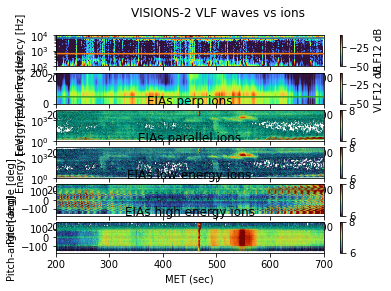

In [ ]:
fig, axs = plt.subplots(6)
fig.suptitle('VISIONS-2 VLF waves vs ions')

kwargs = {"vmin":-50, "vmax":-10}

p=0
Sxx, specfreqs, spectimes, im = axs[p].specgram(vlf12, Fs=fsVLF, NFFT=512, scale='dB', **kwargs, cmap='turbo')
axs[p].plot(spectimes, flh_interp)
axs[p].plot(spectimes, fcH_interp)
axs[p].plot(spectimes, fcO_interp)
axs[p].set_ylabel('Frequency [Hz]')
axs[p].set_xlabel('Time [sec]')
axs[p].set_yscale('log')
axs[p].set_ylim(200,10000)
fig.colorbar(im, label="VLF12 dB", ax=axs[p])

p=p+1
Sxx, specfreqs, spectimes, im = axs[p].specgram(vlf12, Fs=fsVLF, NFFT=512, scale='dB', **kwargs, cmap='turbo')
axs[p].plot(spectimes, flh_interp)
axs[p].plot(spectimes, fcH_interp)
axs[p].plot(spectimes, fcO_interp)
axs[p].set_ylabel('Frequency [Hz]')
axs[p].set_xlabel('Time [sec]')
axs[p].set_yscale('linear')
axs[p].set_ylim(0,200)
fig.colorbar(im, label="VLF12 dB", ax=axs[p])

p=p+1
pcm1 = axs[p].pcolormesh(eiaDatPerp["times"], eiaDatPerp["energies"], np.transpose(np.log10(eiaDatPerp["flux"])), shading='gouraud', cmap='turbo',vmin=6,vmax=8)
axs[p].set_title("EIAs perp ions")
axs[p].set_yscale('log')
axs[p].set_ylim(1, 30000)
axs[p].set_ylabel("Energy [eV]")
axs[p].set_xlabel("MET (sec)")
fig.colorbar(pcm1, ax=axs[p])

p=p+1
pcm1 = axs[p].pcolormesh(eiaDatPar["times"], eiaDatPar["energies"], np.transpose(np.log10(eiaDatPar["flux"])), shading='gouraud', cmap='turbo',vmin=6,vmax=8)
axs[p].set_title("EIAs parallel ions")
axs[p].set_yscale('log')
axs[p].set_ylim(1, 30000)
axs[p].set_ylabel("Energy [eV]")
axs[p].set_xlabel("MET (sec)")
fig.colorbar(pcm1, ax=axs[p])

p=p+1
sort = np.argsort(eiaDatLowE["pitchangles"])
pcm1 = axs[p].pcolormesh(eiaDatLowE["times"], eiaDatLowE["pitchangles"][sort], np.transpose(np.log10(eiaDatLowE["flux"][:,sort])), shading='gouraud', cmap='turbo',vmin=6,vmax=8)
axs[p].set_title("EIAs low energy ions")
axs[p].set_yscale('linear')
axs[p].set_ylim(-180,180)
axs[p].set_ylabel("Pitch-angle [deg]")
axs[p].set_xlabel("MET (sec)")
fig.colorbar(pcm1, ax=axs[p])

p=p+1
sort = np.argsort(eiaDatHigE["pitchangles"])
pcm1 = axs[p].pcolormesh(eiaDatHigE["times"], eiaDatHigE["pitchangles"][sort], np.transpose(np.log10(eiaDatHigE["flux"][:,sort])), shading='gouraud', cmap='turbo',vmin=6,vmax=8)
axs[p].set_title("EIAs high energy ions")
axs[p].set_yscale('linear')
axs[p].set_ylim(-180,180)
axs[p].set_ylabel("Pitch-angle [deg]")
axs[p].set_xlabel("MET (sec)")
fig.colorbar(pcm1, ax=axs[p])


for i in axs: i.set_xlim(200, 700)

### Ion parallel enhancements from 480-600 MET

###### Multiple influxes of ~1 keV ions peaked in FA direction (but fairly broad in PA). These may have a chevron dispersion in PA with perp arriving first
###### 10s eV ions are observed with highly perp PAs
###### Seems to be associated w/ intensification of VLF waves but decrease of ELF (30-300 Hz) waves

LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 


/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_43969/446190719.py:41: RuntimeWarning: divide by zero encountered in log10
  pcm1 = axs[p].pcolormesh(eiaDatPerp["times"], eiaDatPerp["energies"], np.transpose(np.log10(eiaDatPerp["flux"])), shading='gouraud', cmap='turbo',vmin=5,vmax=8)
/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_43969/446190719.py:50: RuntimeWarning: divide by zero encountered in log10
  pcm1 = axs[p].pcolormesh(eiaDatPar["times"], eiaDatPar["energies"], np.transpose(np.log10(eiaDatPar["flux"])), shading='gouraud', cmap='turbo',vmin=5,vmax=8)
/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_43969/446190719.py:60: RuntimeWarning: divide by zero encountered in log10
  pcm1 = axs[p].pcolormesh(eiaDatHigE_tmp["times"], eiaDatHigE_tmp["pitchangles"][sort], np.transpose(np.log10(eiaDatHigE_tmp["flux"][:,sort])), shading='gouraud', cmap='turbo',vmin=6.5,vmax=8)
/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_43969/446190719.py:70:

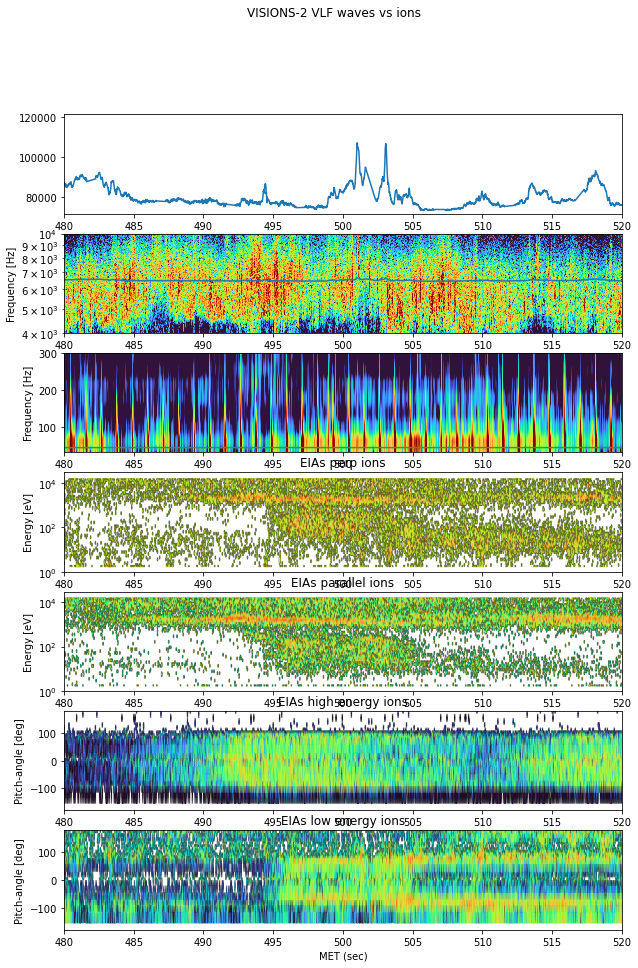

In [ ]:
plt.rcParams['figure.figsize'] = [10, 15]


eiaDatLowE_tmp = visions2_load_data.load_particle("eia",range=[0,50],sumtype=2)
eiaDatHigE_tmp = visions2_load_data.load_particle("eia",range=[800,4000],sumtype=2)


fig, axs = plt.subplots(7)
fig.suptitle('VISIONS-2 VLF waves vs ions')

kwargs = {"vmin":-40, "vmax":-10}

p=0
axs[p].plot(mag["times"], ne)
axs[p].set_yscale('linear')
axs[p].set_ylim(np.median(ne)/1.3, np.median(ne)*1.3)

p=p+1
Sxx, specfreqs, spectimes, im = axs[p].specgram(vlf12, Fs=fsVLF, NFFT=512, scale='dB', **kwargs, cmap='turbo')
axs[p].plot(spectimes, flh_interp)
axs[p].plot(spectimes, fcH_interp)
axs[p].plot(spectimes, fcO_interp)
axs[p].set_ylabel('Frequency [Hz]')
axs[p].set_xlabel('Time [sec]')
axs[p].set_yscale('log')
axs[p].set_ylim(4000,10000)
#fig.colorbar(im, label="VLF12 dB", ax=axs[p])

p=p+1
Sxx, specfreqs, spectimes, im = axs[p].specgram(vlf12, Fs=fsVLF, NFFT=512, scale='dB', **kwargs, cmap='turbo')
axs[p].plot(spectimes, flh_interp)
axs[p].plot(spectimes, fcH_interp)
axs[p].plot(spectimes, fcO_interp)
axs[p].set_ylabel('Frequency [Hz]')
axs[p].set_xlabel('Time [sec]')
axs[p].set_yscale('linear')
axs[p].set_ylim(30,300)
#fig.colorbar(im, label="VLF12 dB", ax=axs[p])

p=p+1
pcm1 = axs[p].pcolormesh(eiaDatPerp["times"], eiaDatPerp["energies"], np.transpose(np.log10(eiaDatPerp["flux"])), shading='gouraud', cmap='turbo',vmin=5,vmax=8)
axs[p].set_title("EIAs perp ions")
axs[p].set_yscale('log')
axs[p].set_ylim(1, 30000)
axs[p].set_ylabel("Energy [eV]")
axs[p].set_xlabel("MET (sec)")
#fig.colorbar(pcm1, ax=axs[p])

p=p+1
pcm1 = axs[p].pcolormesh(eiaDatPar["times"], eiaDatPar["energies"], np.transpose(np.log10(eiaDatPar["flux"])), shading='gouraud', cmap='turbo',vmin=5,vmax=8)
axs[p].set_title("EIAs parallel ions")
axs[p].set_yscale('log')
axs[p].set_ylim(1, 30000)
axs[p].set_ylabel("Energy [eV]")
axs[p].set_xlabel("MET (sec)")
#fig.colorbar(pcm1, ax=axs[p])

p=p+1
sort = np.argsort(eiaDatHigE_tmp["pitchangles"])
pcm1 = axs[p].pcolormesh(eiaDatHigE_tmp["times"], eiaDatHigE_tmp["pitchangles"][sort], np.transpose(np.log10(eiaDatHigE_tmp["flux"][:,sort])), shading='gouraud', cmap='turbo',vmin=6.5,vmax=8)
axs[p].set_title("EIAs high energy ions")
axs[p].set_yscale('linear')
axs[p].set_ylim(-180,180)
axs[p].set_ylabel("Pitch-angle [deg]")
axs[p].set_xlabel("MET (sec)")
#fig.colorbar(pcm1, ax=axs[p])

p=p+1
sort = np.argsort(eiaDatLowE_tmp["pitchangles"])
pcm1 = axs[p].pcolormesh(eiaDatLowE_tmp["times"], eiaDatLowE_tmp["pitchangles"][sort], np.transpose(np.log10(eiaDatLowE_tmp["flux"][:,sort])), shading='gouraud', cmap='turbo',vmin=6,vmax=8)
axs[p].set_title("EIAs low energy ions")
axs[p].set_yscale('linear')
axs[p].set_ylim(-180,180)
axs[p].set_ylabel("Pitch-angle [deg]")
axs[p].set_xlabel("MET (sec)")
#fig.colorbar(pcm1, ax=axs[p])

#for i in axs: i.set_xlim(480, 600)
for i in axs: i.set_xlim(480, 520)

In [ ]:
"""
Recreate Rob's poster plot of EEAs electrons from 3-30 eV for 0 deg pitch angle bin for times of 326 - 344 sec from launch
"""




hhere


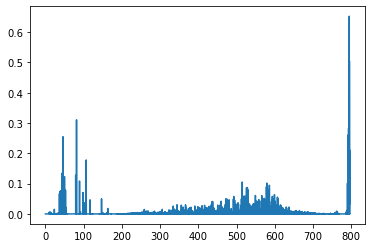

In [7]:
#Test calculate RMS amplitude for spectra 

#vlf12
#np.shape(vlf12)
#times_vlf = vlf12_data["tvlf12"]
#Sxx, specfreqs, spectimes

#257 freqs
#41452 spectimes

flow = 100. 
fhig = 1000. 

goodf = np.where((specfreqs >= flow) & (specfreqs <= fhig))

rmsamp = []

for i in range(len(spectimes)):
    rmsamp.append(np.sum(Sxx[goodf, i])/np.size(goodf))

print("hhere")

